In [1]:
import csv
import datetime
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv('TSLA_1M.csv')
dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-01,1081.150024,1094.750000,1066.640015,1084.589966,1084.589966,18087700
1,2022-04-04,1089.380005,1149.910034,1072.530029,1145.449951,1145.449951,27345300
2,2022-04-05,1136.300049,1152.869995,1087.300049,1091.260010,1091.260010,26691700
3,2022-04-06,1073.469971,1079.000000,1027.699951,1045.760010,1045.760010,29782800
4,2022-04-07,1052.390015,1076.589966,1021.539978,1057.260010,1057.260010,26482400
5,2022-04-08,1043.209961,1048.439941,1022.440002,1025.489990,1025.489990,18337900
6,2022-04-11,980.400024,1008.469971,974.640015,975.929993,975.929993,19785700
7,2022-04-12,997.640015,1021.190002,976.599976,986.950012,986.950012,21992000
8,2022-04-13,981.080017,1026.239990,973.099976,1022.369995,1022.369995,18373700
9,2022-04-14,999.289978,1012.710022,982.190002,985.000000,985.000000,19474100


In [22]:
def get_data(dataframe):  
    data = dataframe.copy()
    data['Date'] = data['Date'].str.split('-').str[2]
    data['Date'] = pd.to_numeric(data['Date'])
    return [ data['Date'].tolist(), data['Open'].tolist() ]

In [23]:
Open_date, open_price = get_data(dataframe)

In [27]:
def predict_prices(Open_date, open_price, x):
    Open_date = np.reshape(Open_date,(len(Open_date), 1)) 
    x = np.reshape(x,(len(x), 1))
    
    svr_lin  = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    
    svr_lin .fit(Open_date, open_price)
    svr_poly.fit(Open_date, open_price)
    svr_rbf.fit(Open_date, open_price)
    
    plt.scatter(Open_date, open_price, c='k', label='Data')
    plt.plot(Open_date, svr_lin.predict(Open_date), c='g', label='Linear model')
    plt.plot(Open_date, svr_rbf.predict(Open_date), c='r', label='RBF model')    
    plt.plot(Open_date, svr_poly.predict(Open_date), c='b', label='Polynomial model')
    
    plt.xlabel('Date')
    plt.ylabel('Open')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

In [28]:
print(Open_date, open_price)

[1, 4, 5, 6, 7, 8, 11, 12, 13, 14, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29] [1081.150024, 1089.380005, 1136.300049, 1073.469971, 1052.390015, 1043.209961, 980.400024, 997.640015, 981.080017, 999.289978, 989.030029, 1005.059998, 1030.0, 1074.72998, 1014.909973, 978.969971, 995.429993, 898.580017, 899.97998, 902.25]


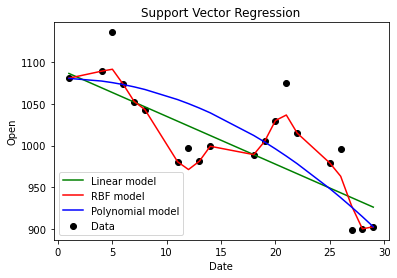

In [33]:
Predict_open_price = predict_prices(Open_date, open_price, [32])

In [34]:
Predict_open_price

(987.6294760476794, 908.744592273018, 863.4717430329706)